# Introduction

The COVID-19 pandemic has altered much in the daily lives of millions of people.  News reports have reported people leaving high density metro areas for suburbs and rural areas.  This project seeks to identify changes in housing market data since March 2020 and investigates correlations with covid prevalence.

This project relies on data from the New York Times' COVID data set and the Federal Housing Finance Agency (FHFA) as our reliable data sources.



**Market Level Changes in the HPI**

The FHFA reports a Housing Price Index (HPI) for every state and most metropolitan areas in the US every quarter.  Additionally, they report an HPI for the non-metro area for each state. 

To begin our analysis of the housing market, we need a good measure of change in the index for each reported area over the time since the start of the COVID pandemic.  Since our housing data is quarterly, and policy interventions began in mid-March 2020 we will look at changes in the housing market from Q2 2020 to the most recent data in the data set.

To begin, we will load the housing module Eric wrote. We will use that module to create a housing data object with our subset of data since 2015.  We will use our data object and methods from our module create arrays with the HPI, and year over year change in both change in the index and the percent change of the index.

In [9]:
import housing
import numpy as np
import matplotlib.pyplot as plt

o = housing.HousingData()
state_change = housing.yoy_change(o.state_data, 2020)
msa_change = housing.yoy_change(o.metro_data, 2020)


2021-03-05 07:18:28,678 - root - INFO - Data file found in directory


Now that we have data for 2020 let's look at this from a market level,  with a histogram of the year over year change in the HPI for state level data. 

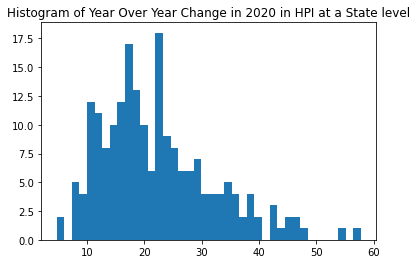

In [3]:
d_ch = []
for i in state_change:
    d_ch.append(i[5])

d = d_ch
plt.hist(d, bins =40)
plt.title("Histogram of Year Over Year Change in 2020 in HPI at a State level")


plt.show()


It looks like we have year over year growth for all state in all quarters of 2020, and that growth is distributed in a log normal fashion.  Let's look at the percentage growth for the same period.

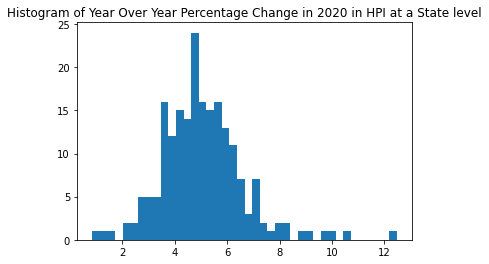

In [5]:
p_ch = []
for i in state_change:
    p_ch.append(i[6])

p = p_ch
plt.hist(p, bins =40)
plt.title("Histogram of Year Over Year Percentage Change in 2020 in HPI at a State level")


plt.show()

When we look at percentages we get closer to a normal distribution, though it is still skewed.

Let's look at how the metro level changes in HPI are distributed.



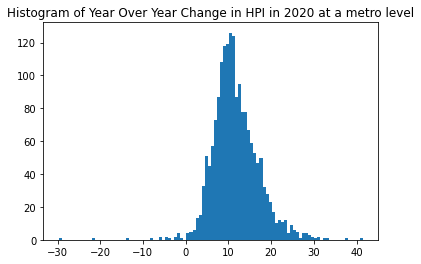

In [7]:
md_ch=[]
for i in msa_change:
    md_ch.append(i[5])

md = md_ch
plt.hist(md, bins =100)
plt.title("Histogram of Year Over Year Change in HPI in 2020 at a metro level")


plt.show()

This distribution is also skewed, but we can see some areas of negative growth in this distribution.  

Let's see how significant that negative growth is on a percentage basis.

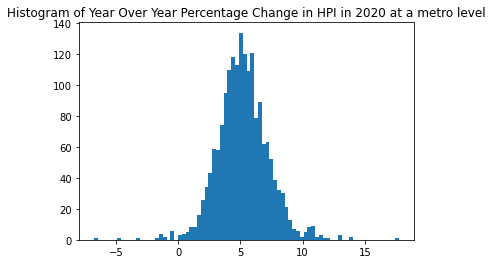

In [8]:
mp_ch = []

for i in msa_change:
    mp_ch.append(i[6])

mp = mp_ch
plt.hist(mp, bins =80)

plt.title("Histogram of Year Over Year Percentage Change in HPI in 2020 at a metro level")


plt.show()

This distribution looks like a normal distribution.  The negative growth we saw in the point change of HPI is present here,  the largest drop in HPI is around 7% year over year.

These  histograms tell us that some metro areas experienced a drop in home prices in 2020 while on a state level there was only growth in home prices, but tell us nothing of the context of these changes.  To add this context we will prepare our data to show a ridgeline graph of these histograms for a greater historical context.  We will look at five years of data and build a ridgeline style histogram for each quarter on a single plot. We will also look at the distribution as over time using a strip plot.

To do this first we have to pull the appropriate data from our data object. We will pull year over year data from 2016 to 2019 for state and metro level data, and append that data to our current arrays.

In [66]:
import pandas as pd

s_2016 = housing.yoy_change(o.state_data, 2016)
s_2017 = housing.yoy_change(o.state_data, 2017)
s_2018 = housing.yoy_change(o.state_data, 2018)
s_2019 = housing.yoy_change(o.state_data, 2019)
s_2020 = housing.yoy_change(o.state_data, 2019)
state = []
for line in s_2016:
    state.append(line)
for line in s_2017:
    state.append(line)
for line in s_2018:
    state.append(line)
for line in s_2019:
    state.append(line)
for line in s_2020:
    state.append(line)
    
m_2016 = housing.yoy_change(o.metro_data, 2016)
m_2017 = housing.yoy_change(o.metro_data, 2017)
m_2018 = housing.yoy_change(o.metro_data, 2018)
m_2019 = housing.yoy_change(o.metro_data, 2019)
m_2020 = housing.yoy_change(o.metro_data, 2020)
msa = []
for line in m_2016:
    msa.append(line)
for line in m_2017:
    msa.append(line)
for line in m_2018:
    msa.append(line)
for line in m_2019:
    msa.append(line)
for line in m_2020:
    msa.append(line)
    
df_s = pd.DataFrame(state_change, 
                    columns = ['Place Name', 'Place ID', 'Year', 'Quarter',\
                               'HPI', 'YoY change', '% YoY change', 'year_dec_quarter'])
df_m = pd.DataFrame(msa_change, 
                    columns = ['Place Name', 'Place ID', 'Year', 'Quarter',\
                               'HPI', 'YoY change', '% YoY change', 'year_dec_quarter'])
df_m.describe()


,Year,Quarter,HPI,YoY change,% YoY change,year_dec_quarter
count,45100.000000,45100.000000,45100.000000,45100.000000,45100.000000,45100.000000
mean,2017.600000,2.500000,210.757470,9.845844,4.785700,2017.975000
std,1.200013,1.118046,46.868298,6.871774,2.963862,1.232136
min,2016.000000,1.000000,117.130000,-29.750000,-9.020571,2016.000000
25%,2017.000000,1.750000,177.870000,5.340000,2.909520,2017.000000
50%,2018.000000,2.500000,200.580000,8.940000,4.640036,2018.000000
75%,2019.000000,3.250000,233.190000,13.520000,6.488945,2019.000000
max,2020.000000,4.000000,482.780000,58.120000,19.166567,2020.750000


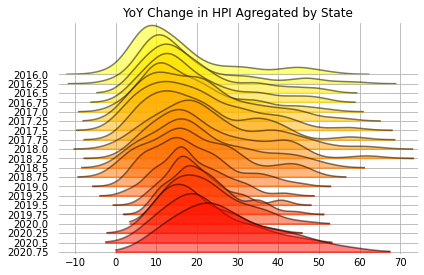

In [65]:
import joypy 
from matplotlib import cm
%matplotlib inline

fig, axes =joypy.joyplot(df_s, by = 'year_dec_quarter', 
       column = 'YoY change', range_style = 'own', ylim='own',
       grid = True, colormap = cm.autumn_r, title = 'YoY Change in HPI Agregated by State', alpha = 0.5)


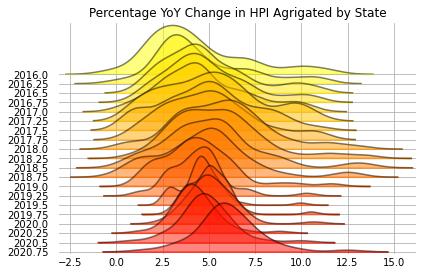

In [58]:
fig, axes =joypy.joyplot(df_s, by = 'year_dec_quarter', 
       column = '% YoY change', range_style = 'own', ylim='own',
       grid = True, colormap = cm.autumn_r, title = 'Percentage YoY Change in HPI Agrigated by State', alpha = 0.5)



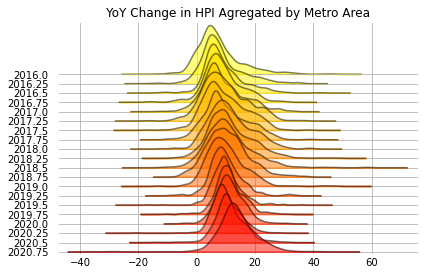

In [60]:
%matplotlib inline

fig, axes =joypy.joyplot(df_m, by = 'year_dec_quarter', 
       column = 'YoY change', range_style = 'own', ylim='own',
       grid = True, colormap = cm.autumn_r, title = 'YoY Change in HPI Agregated by Metro Area', alpha = 0.5)

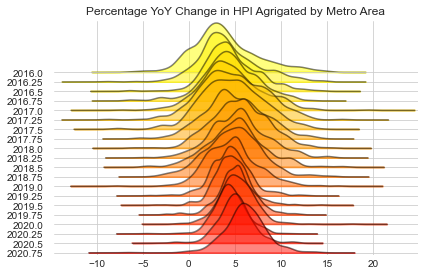

In [75]:
fig, axes =joypy.joyplot(df_m, by = 'year_dec_quarter', 
       column = '% YoY change', range_style = 'own', ylim='own',
       grid = True, colormap = cm.autumn_r, title = 'Percentage YoY Change in HPI Agrigated by Metro Area', alpha = 0.5)



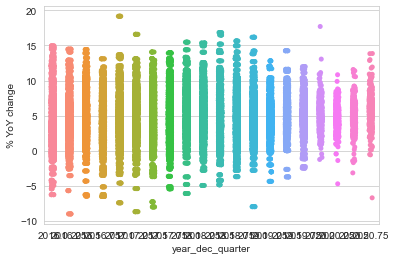

In [74]:
import seaborn as sns
sns.set_style("whitegrid")

ax = sns.stripplot(x = "year_dec_quarter", y='% YoY change', data=df_m)

plt.show()

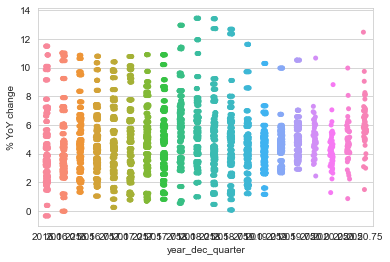

In [76]:
ax = sns.stripplot(x = "year_dec_quarter", y='% YoY change', data=df_s)

plt.show()

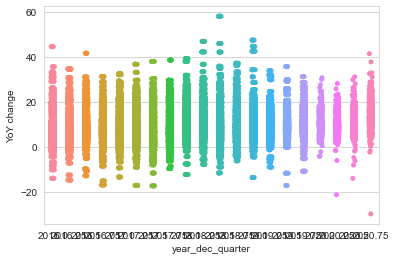

In [77]:
sns.set_style("whitegrid")

ax = sns.stripplot(x = "year_dec_quarter", y='YoY change', data=df_m)

plt.show()

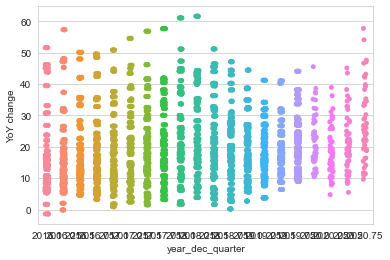

In [78]:
ax = sns.stripplot(x = "year_dec_quarter", y='YoY change', data=df_s)

plt.show()